In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Kara = pd.read_excel(filepath, sheet_name='Kara-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Kara)
fp.date_time(Kara)

,Extent,Date
0,917992.880,1979-01-01
1,917992.880,1979-02-01
2,917992.880,1979-03-01
3,917992.880,1979-04-01
4,917992.880,1979-05-01
...,...,...
533,728642.743,2023-06-01
534,437024.646,2023-07-01
535,202260.789,2023-08-01
536,98103.856,2023-09-01


In [5]:
scaler = MinMaxScaler()
Kara['Extent'] = scaler.fit_transform(Kara['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 10
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Kara['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((517, 12, 1), (517,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Kara_model_LT10/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
43/53 [=======================>......] - ETA: 0s - loss: 0.6372 - root_mean_squared_error: 0.7983

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 8s 98ms/step - loss: 0.6387 - root_mean_squared_error: 0.7992 - val_loss: 0.4643 - val_root_mean_squared_error: 0.6814
Epoch 2/50
46/53 [=========================>....] - ETA: 0s - loss: 0.5646 - root_mean_squared_error: 0.7514

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.5658 - root_mean_squared_error: 0.7522 - val_loss: 0.4357 - val_root_mean_squared_error: 0.6601
Epoch 3/50
52/53 [============================>.] - ETA: 0s - loss: 0.5006 - root_mean_squared_error: 0.7075

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.5002 - root_mean_squared_error: 0.7072 - val_loss: 0.4019 - val_root_mean_squared_error: 0.6339
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.4515 - root_mean_squared_error: 0.6719

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.4464 - root_mean_squared_error: 0.6681 - val_loss: 0.3596 - val_root_mean_squared_error: 0.5996
Epoch 5/50
46/53 [=========================>....] - ETA: 0s - loss: 0.3810 - root_mean_squared_error: 0.6173

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.3872 - root_mean_squared_error: 0.6222 - val_loss: 0.3263 - val_root_mean_squared_error: 0.5712
Epoch 6/50
47/53 [=========================>....] - ETA: 0s - loss: 0.3288 - root_mean_squared_error: 0.5734

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.3364 - root_mean_squared_error: 0.5800 - val_loss: 0.2834 - val_root_mean_squared_error: 0.5324
Epoch 7/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2971 - root_mean_squared_error: 0.5451

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.2913 - root_mean_squared_error: 0.5397 - val_loss: 0.2454 - val_root_mean_squared_error: 0.4954
Epoch 8/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2536 - root_mean_squared_error: 0.5036

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.2450 - root_mean_squared_error: 0.4949 - val_loss: 0.1975 - val_root_mean_squared_error: 0.4444
Epoch 9/50
45/53 [========================>.....] - ETA: 0s - loss: 0.2034 - root_mean_squared_error: 0.4510

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.2045 - root_mean_squared_error: 0.4523 - val_loss: 0.1680 - val_root_mean_squared_error: 0.4099
Epoch 10/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1676 - root_mean_squared_error: 0.4094

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.1662 - root_mean_squared_error: 0.4077 - val_loss: 0.1376 - val_root_mean_squared_error: 0.3709
Epoch 11/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1379 - root_mean_squared_error: 0.3714

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.1350 - root_mean_squared_error: 0.3674 - val_loss: 0.0901 - val_root_mean_squared_error: 0.3002
Epoch 12/50
52/53 [============================>.] - ETA: 0s - loss: 0.1072 - root_mean_squared_error: 0.3275

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.1078 - root_mean_squared_error: 0.3284 - val_loss: 0.0887 - val_root_mean_squared_error: 0.2978
Epoch 13/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0929 - root_mean_squared_error: 0.3048

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0912 - root_mean_squared_error: 0.3021 - val_loss: 0.0599 - val_root_mean_squared_error: 0.2447
Epoch 14/50
52/53 [============================>.] - ETA: 0s - loss: 0.0694 - root_mean_squared_error: 0.2634

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0701 - root_mean_squared_error: 0.2647 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1698
Epoch 15/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0577 - root_mean_squared_error: 0.2403 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1813
Epoch 16/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0445 - root_mean_squared_error: 0.2110 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1713
Epoch 17/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0399 - root_mean_squared_error: 0.1997 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1705
Epoch 18/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0329 - root_mean_squared_error: 0.1814

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0325 - root_mean_squared_error: 0.1802 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1312
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0348 - root_mean_squared_error: 0.1865 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1511
Epoch 20/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0278 - root_mean_squared_error: 0.1667

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0271 - root_mean_squared_error: 0.1647 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1208
Epoch 21/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0266 - root_mean_squared_error: 0.1631

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0277 - root_mean_squared_error: 0.1664 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1201
Epoch 22/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0236 - root_mean_squared_error: 0.1535

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0232 - root_mean_squared_error: 0.1522 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1188
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0270 - root_mean_squared_error: 0.1643 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1205
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0233 - root_mean_squared_error: 0.1527 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1295
Epoch 25/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0224 - root_mean_squared_error: 0.1498

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0227 - root_mean_squared_error: 0.1506 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1163
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0254 - root_mean_squared_error: 0.1593 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1164
Epoch 27/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0239 - root_mean_squared_error: 0.1545 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1246
Epoch 28/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0280 - root_mean_squared_error: 0.1674 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1329
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0201 - root_mean_squared_error: 0.1417 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1212
Epoch 30/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0204 - root_mean_squared_error: 0.1430 - val_loss: 0.0141 - val_root_mean_squared

INFO:tensorflow:Assets written to: Kara_model_LT10\assets


INFO:tensorflow:Assets written to: Kara_model_LT10\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0208 - root_mean_squared_error: 0.1441 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157
Epoch 35/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0244 - root_mean_squared_error: 0.1560 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1161
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0225 - root_mean_squared_error: 0.1500 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1295
Epoch 37/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0192 - root_mean_squared_error: 0.1386 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1433
Epoch 38/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0230 - root_mean_squared_error: 0.1518 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1219
Epoch 39/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0195 - root_mean_squared_error: 0.1395 - val_loss: 0.0197 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.8991366942723593 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

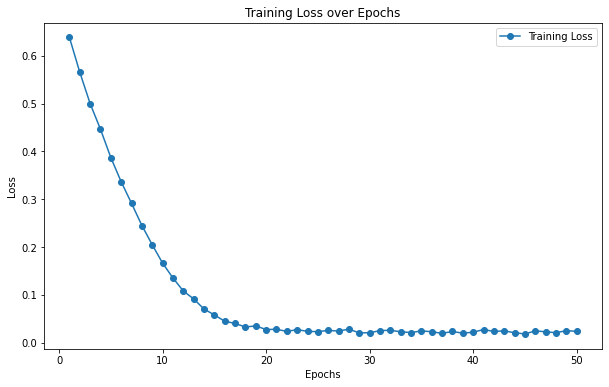

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

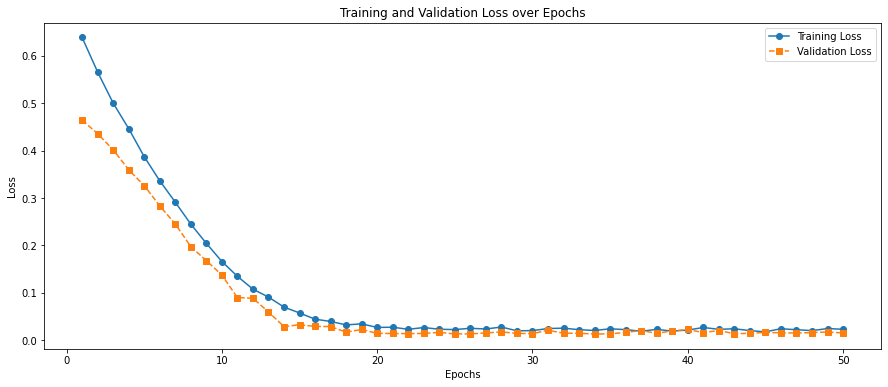

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Kara_model_LT10/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.13756611908716052
MAE : 0.09853972658604446


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,931459.187500,906368.363
1,947626.750000,917403.622
2,921170.812500,910653.838
3,945191.937500,822319.125
4,708650.125000,557314.102
5,405891.937500,197129.525
6,78158.531250,75730.217
7,9920.052734,59608.479
8,332973.968750,88785.283
9,724989.625000,396883.400


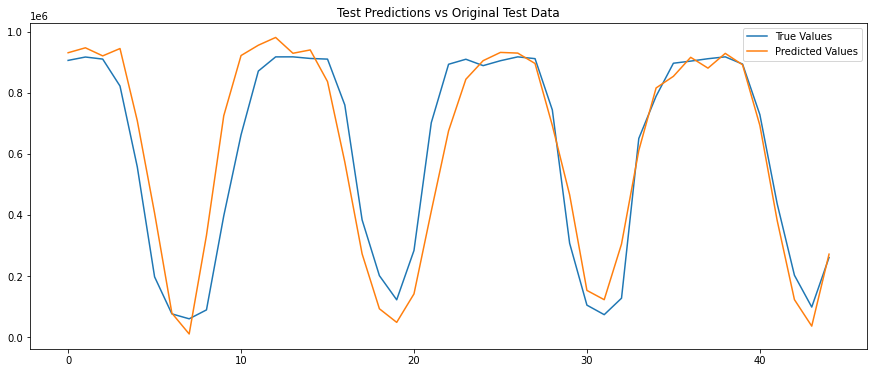

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

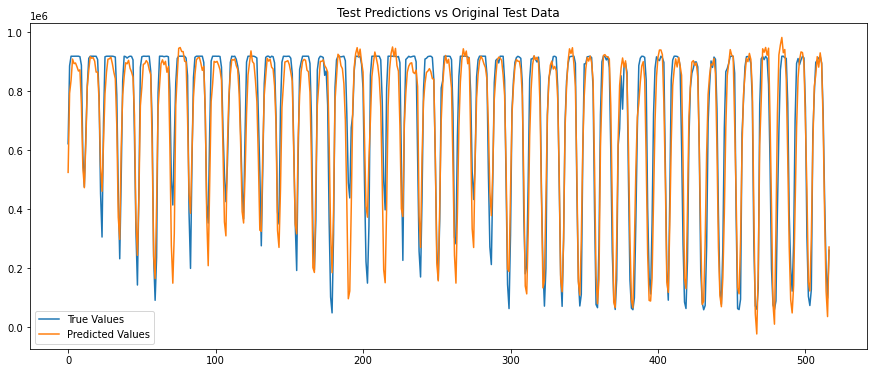

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()